In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
#import the dataset as raw_311
raw_311= pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv', 
                     header=0, sep=',',parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],
                     index_col='Unique Key')

C:\Users\Sachin R B\AppData\Local\Temp\ipykernel_5368\1386051175.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_311= pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv',


In [3]:
#identify shape of the dataset
raw_311.shape

(364558, 52)

In [4]:
#identify variables with null values
raw_311.isnull().sum()

Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough                                0
X Coordinate (St

In [5]:
#Missing value treatment
percent_raw_311=(raw_311['Closed Date'].isnull().sum(axis=0)/raw_311.shape[0])*100
percent_raw_311

0.6531196682009447

In [6]:
# Drop the null values
raw_311.dropna(subset=['Closed Date'], inplace=True)


In [7]:
#Check for the drop value again 
raw_311.isnull().sum()

Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6496
Location Type                        130
Incident Zip                         675
Incident Address                   51686
Street Name                        51686
Cross Street 1                     55331
Cross Street 2                     55464
Intersection Street 1             311549
Intersection Street 2             311673
Address Type                         929
City                                 674
Landmark                          361802
Facility Type                         18
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough                                0
X Coordinate (St

In [8]:
#Draw frequency plot for city wise complaints
# 1. Select required data
freq_complaint=pd.DataFrame()
freq_complaint['City']=raw_311['City']
freq_complaint['Complaint Type']=raw_311['Complaint Type']
freq_complaint.head()

,City,Complaint Type
Unique Key,,
32310363,NEW YORK,Noise - Street/Sidewalk
32309934,ASTORIA,Blocked Driveway
32309159,BRONX,Blocked Driveway
32305098,BRONX,Illegal Parking
32306529,ELMHURST,Illegal Parking


<AxesSubplot:title={'center':'City wise complaint types '}, xlabel='count', ylabel='City'>

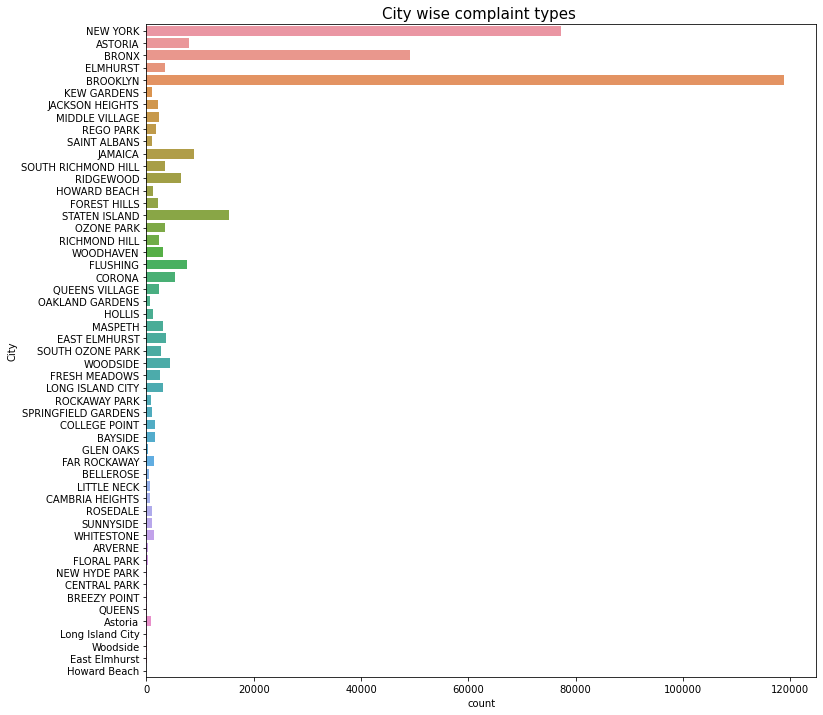

In [9]:
#Plot frequency plot for city wise complaints
plt.figure(figsize=(12,12))
plt.title("City wise complaint types ", fontsize=15)
sns.countplot(y='City', data=freq_complaint)

In [10]:
#Draw scatter plot for complaint concentration across Brooklyn
# 1.select data for scatter plot
location=pd.DataFrame()
location['City']=raw_311['City']
location['Latitude']=raw_311['Latitude']
location['Longitude']=raw_311['Longitude']
location.head()

,City,Latitude,Longitude
Unique Key,,,
32310363,NEW YORK,40.865682,-73.923501
32309934,ASTORIA,40.775945,-73.915094
32309159,BRONX,40.870325,-73.888525
32305098,BRONX,40.835994,-73.828379
32306529,ELMHURST,40.733060,-73.874170


In [11]:
#select data for Brooklyn
location=location.loc[location['City']=='BROOKLYN']
location.head()

,City,Latitude,Longitude
Unique Key,,,
32306554,BROOKLYN,40.660823,-73.992568
32308391,BROOKLYN,40.623793,-73.999539
32305074,BROOKLYN,40.687511,-73.874505
32310273,BROOKLYN,40.679154,-73.983430
32306617,BROOKLYN,40.616550,-73.930202


<AxesSubplot:title={'center':'Complaint Concentration Across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

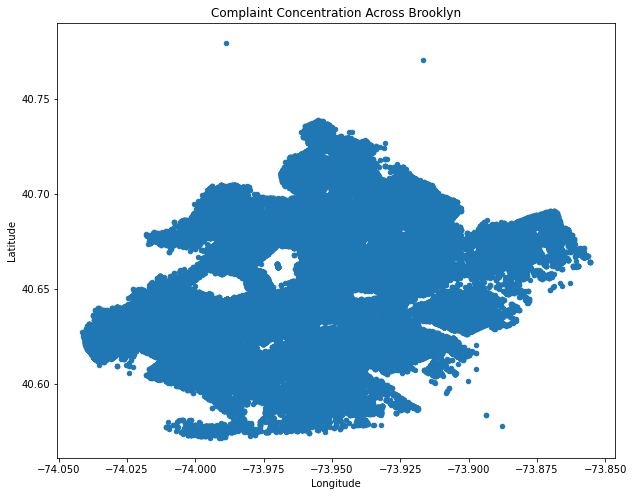

In [12]:
#Plot scatter
location[['Longitude','Latitude']].plot(kind='scatter', x='Longitude',y='Latitude', figsize=(10,8)
                                      ,title='Complaint Concentration Across Brooklyn')

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

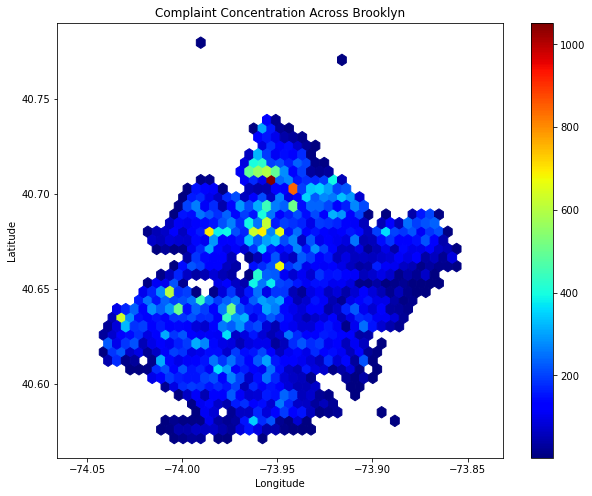

In [13]:
#Plot Hexbin
location.plot(kind= 'hexbin', x='Longitude', y='Latitude', gridsize=40,sharex=False,
             colormap='jet', mincnt=1, title='Complaint Concentration Across Brooklyn',
              figsize=(10,8)).axis('equal')

In [14]:
#Find major types of complaints:
#Select the complaint data from dataset
complaint=pd.DataFrame()
complaint['Complaint Type']=raw_311['Complaint Type']
complaint.head()

,Complaint Type
Unique Key,
32310363,Noise - Street/Sidewalk
32309934,Blocked Driveway
32309159,Blocked Driveway
32305098,Illegal Parking
32306529,Illegal Parking


<AxesSubplot:title={'center':'Count Vs Complaint types'}>

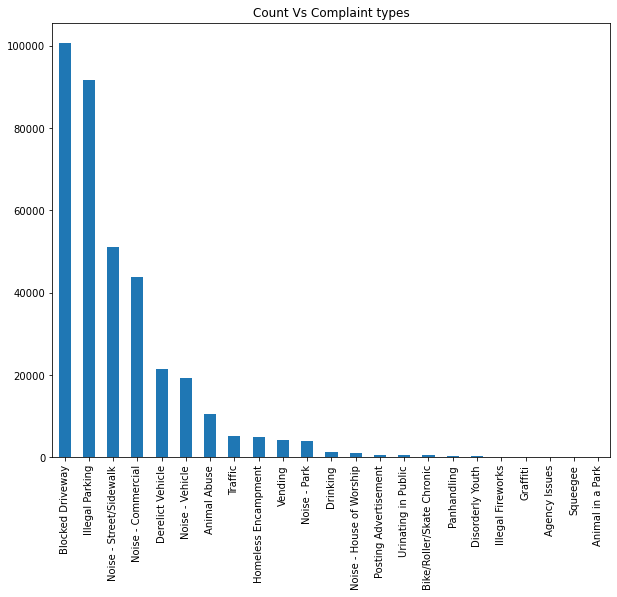

In [15]:
# 1. plot bar graph of count vs complaint types
(raw_311['Complaint Type'].value_counts()).head(23).plot (kind='bar',
                    figsize=(10,8), title='Count Vs Complaint types')

<AxesSubplot:title={'center':'Top 10 Types of Complaints'}>

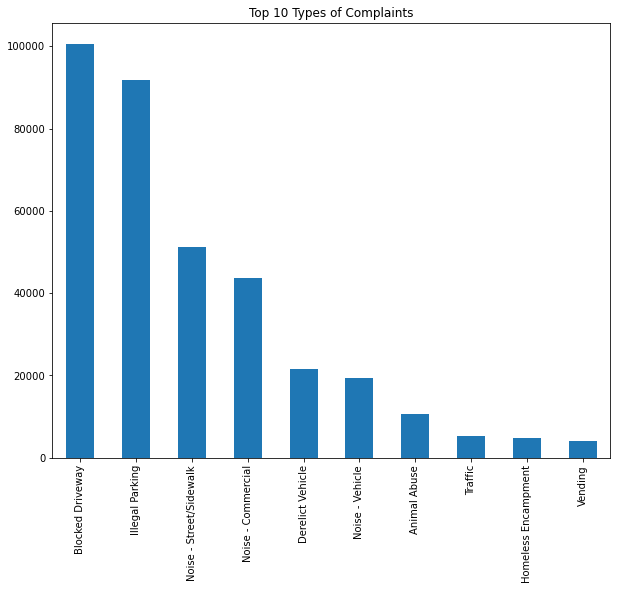

In [16]:
# 2. find the top 10 Types of complaints 
(raw_311['Complaint Type'].value_counts()).head(10).plot(kind='bar',
        figsize=(10,8),title='Top 10 Types of Complaints')

In [60]:
raw_311['Complaint Type'].value_counts().head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [71]:
# 2. dataset of top 10 Complaints 
top_10_complaint=pd.DataFrame(raw_311['Complaint Type'].value_counts().head(10))
top_10_complaint.head(10)

,Complaint Type
Blocked Driveway,100624
Illegal Parking,91716
Noise - Street/Sidewalk,51139
Noise - Commercial,43751
Derelict Vehicle,21518
Noise - Vehicle,19301
Animal Abuse,10530
Traffic,5196
Homeless Encampment,4879
Vending,4185


In [20]:
# 3. display the types of complaints in each city in separate dataset
types_of_complaint_each_city=pd.crosstab(index=raw_311['City'], columns=raw_311['Complaint Type'])
types_of_complaint_each_city.head(5)

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0


Text(0.5, 1.0, 'Types of Complaints in Each City')

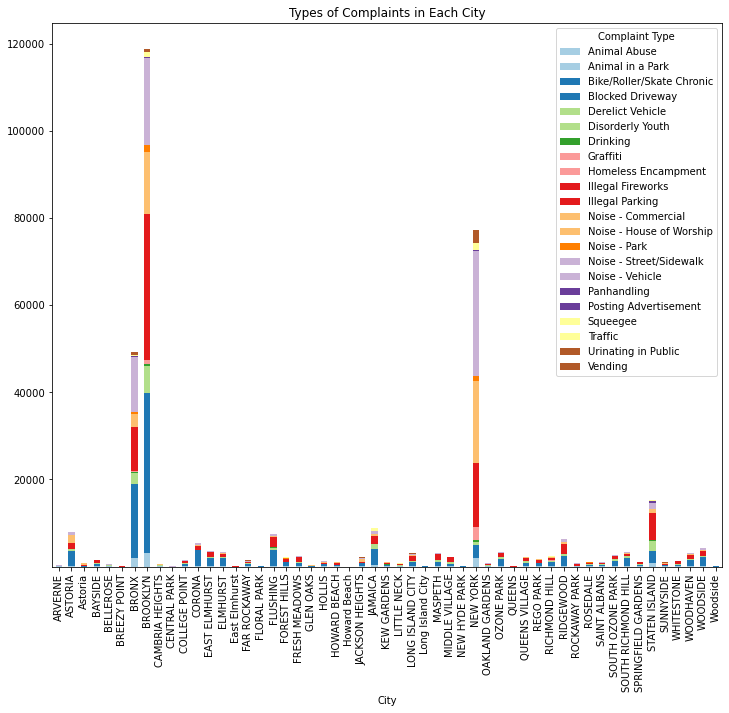

In [55]:
# Visualize the major types of complaints in each city
types_of_complaint_each_city.plot(kind='bar', figsize=(12,10), stacked= True, colormap='Paired')
plt.title('Types of Complaints in Each City')

In [22]:
# Check the average response time across verious types complaints
#select required data from dataset
date_time=pd.DataFrame()
date_time['Complaint Type']=raw_311['Complaint Type']
date_time['Created Date']=raw_311['Created Date']
date_time['Closed Date']=raw_311['Closed Date']
date_time.head()

,Complaint Type,Created Date,Closed Date
Unique Key,,,
32310363,Noise - Street/Sidewalk,2015-12-31 23:59:45,2016-01-01 00:55:15
32309934,Blocked Driveway,2015-12-31 23:59:44,2016-01-01 01:26:57
32309159,Blocked Driveway,2015-12-31 23:59:29,2016-01-01 04:51:03
32305098,Illegal Parking,2015-12-31 23:57:46,2016-01-01 07:43:13
32306529,Illegal Parking,2015-12-31 23:56:58,2016-01-01 03:24:42


In [24]:
# Average response time of verious types of complaints in seperate dataset 
date_time['Date_hour']=date_time['Closed Date']-date_time['Created Date']
date_time['Date_hour']=date_time['Date_hour']/np.timedelta64(1,'h')
date_time.head()

,Complaint Type,Created Date,Closed Date,Date_hour
Unique Key,,,,
32310363,Noise - Street/Sidewalk,2015-12-31 23:59:45,2016-01-01 00:55:15,0.925000
32309934,Blocked Driveway,2015-12-31 23:59:44,2016-01-01 01:26:57,1.453611
32309159,Blocked Driveway,2015-12-31 23:59:29,2016-01-01 04:51:03,4.859444
32305098,Illegal Parking,2015-12-31 23:57:46,2016-01-01 07:43:13,7.757500
32306529,Illegal Parking,2015-12-31 23:56:58,2016-01-01 03:24:42,3.462222


In [43]:
#Show data 
date_time['Date_hour']=date_time['Closed Date']-date_time['Created Date']
date_time.head()

,Complaint Type,Created Date,Closed Date,Date_hour
Unique Key,,,,
32310363,Noise - Street/Sidewalk,2015-12-31 23:59:45,2016-01-01 00:55:15,0 days 00:55:30
32309934,Blocked Driveway,2015-12-31 23:59:44,2016-01-01 01:26:57,0 days 01:27:13
32309159,Blocked Driveway,2015-12-31 23:59:29,2016-01-01 04:51:03,0 days 04:51:34
32305098,Illegal Parking,2015-12-31 23:57:46,2016-01-01 07:43:13,0 days 07:45:27
32306529,Illegal Parking,2015-12-31 23:56:58,2016-01-01 03:24:42,0 days 03:27:44


In [76]:
final_date=pd.DataFrame()
final_date['Complaint Type']=date_time['Complaint Type']
final_date['Date_hour']=date_time['Date_hour']
final_date.head()

,Complaint Type,Date_hour
Unique Key,,
32310363,Noise - Street/Sidewalk,0 days 00:55:30
32309934,Blocked Driveway,0 days 01:27:13
32309159,Blocked Driveway,0 days 04:51:34
32305098,Illegal Parking,0 days 07:45:27
32306529,Illegal Parking,0 days 03:27:44


In [78]:
final1=final_date.loc[final_date['Complaint Type']=='Blocked Driveway']
final2=final_date.loc[final_date['Complaint Type']=='Illegal Parking']
final3=final_date.loc[final_date['Complaint Type']=='Noise - Street/Sidewalk']
final4=final_date.loc[final_date['Complaint Type']=='Noise - Commercial']
final5=final_date.loc[final_date['Complaint Type']=='Derelict Vehicle']
final6=final_date.loc[final_date['Complaint Type']=='Noise - Vehicle']
final7=final_date.loc[final_date['Complaint Type']=='Animal Abuse']
final8=final_date.loc[final_date['Complaint Type']=='Traffic']
final9=final_date.loc[final_date['Complaint Type']=='Homeless Encampment']
final10=final_date.loc[final_date['Complaint Type']=='Vending']

print(final1, final2)


              Complaint Type       Date_hour
Unique Key                                  
32309934    Blocked Driveway 0 days 01:27:13
32309159    Blocked Driveway 0 days 04:51:34
32307009    Blocked Driveway 0 days 01:48:49
32308391    Blocked Driveway 0 days 01:23:42
32305071    Blocked Driveway 0 days 07:48:40
...                      ...             ...
29613386    Blocked Driveway 0 days 02:33:49
29610965    Blocked Driveway 0 days 01:09:41
29610950    Blocked Driveway 0 days 05:58:35
29610889    Blocked Driveway 0 days 02:40:53
29611816    Blocked Driveway 0 days 02:47:00

[100624 rows x 2 columns]              Complaint Type       Date_hour
Unique Key                                 
32305098    Illegal Parking 0 days 07:45:27
32306529    Illegal Parking 0 days 03:27:44
32306554    Illegal Parking 0 days 01:53:41
32306559    Illegal Parking 0 days 01:58:22
32308581    Illegal Parking 0 days 08:33:34
...                     ...             ...
29609798    Illegal Parking 0 days 0

In [92]:
# Average Response time of major Complaints 
print('Blocked Driveway         ',final1['Date_hour'].mean())
print('Illegal Parking          ',final2['Date_hour'].mean())
print('Noise - Street/Sidewalk  ',final3['Date_hour'].mean())
print('Noise - Commercial       ',final4['Date_hour'].mean())
print('Derelict Vehicle         ',final5['Date_hour'].mean())
print('Noise - Vehicle          ',final6['Date_hour'].mean())
print('Animal Abuse             ',final7['Date_hour'].mean())
print('Traffic                  ',final8['Date_hour'].mean())
print('Homeless Encampment      ',final9['Date_hour'].mean())
print('Vending                  ',final10['Date_hour'].mean())


Blocked Driveway          0 days 04:30:32.521515741
Illegal Parking           0 days 04:20:50.435670984
Noise - Street/Sidewalk   0 days 03:23:51.295410547
Noise - Commercial        0 days 03:04:45.760531187
Derelict Vehicle          0 days 07:02:39.600102239
Noise - Vehicle           0 days 03:29:21.800010362
Animal Abuse              0 days 05:00:32.556030389
Traffic                   0 days 03:25:09.120092378
Homeless Encampment       0 days 04:17:31.384505021
Vending                   0 days 03:59:26.278375149
